In [24]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

In [25]:
K = 1.75
alpha_C = -11.4
alpha_N = -11.4


In [26]:
n = 4
H = np.zeros((n, n))
print(H)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [27]:
for i in range(n):
    H[i, i] = alpha_C
    if i == 0:
        H[i, i] = alpha_N

print(H)

[[-11.4   0.    0.    0. ]
 [  0.  -11.4   0.    0. ]
 [  0.    0.  -11.4   0. ]
 [  0.    0.    0.  -11.4]]


In [28]:
Butadiene = """  C    0.0000000   -0.1296399    1.8247010
  C    0.0000000    0.4192304    0.6078236
  C    0.0000000   -0.4192304   -0.6078236
  C    0.0000000    0.1296399   -1.8247010
  H    0.0000000    0.5043713    2.7054618
  H    0.0000000   -1.2078298    1.9552765
  H    0.0000000    1.5023424    0.5188188
  H    0.0000000   -1.5023424   -0.5188188
  H    0.0000000    1.2078298   -1.9552765
  H    0.0000000   -0.5043713   -2.7054618
  """
carbon_coordinates = pts.taking_carbon_coordinates(Butadiene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)

butadiene_molecule = gto.M(atom=Butadiene, basis='sto-3g')#'sto-6g''ccpvdz'
print(butadiene_molecule.ao_labels())
pz_indices = [i for i, label in enumerate(butadiene_molecule.ao_labels()) if 'C 2px' in label]
print(pz_indices)
hf = scf.RHF(butadiene_molecule)
hf_energy = hf.kernel()


S = hf.get_ovlp()[[2, 7, 12,17]][:, [2, 7, 12,17]]


print(S)

[[ 1.824701  -0.1296399]
 [ 0.6078236  0.4192304]
 [-0.6078236 -0.4192304]
 [-1.824701   0.1296399]]
['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 H 1s    ', '5 H 1s    ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ']
[2, 7, 12, 17]


converged SCF energy = -153.016778366309
[[1.00000000e+00 2.39413565e-01 2.37022198e-02 8.66242843e-04]
 [2.39413565e-01 1.00000000e+00 1.85031828e-01 2.37022198e-02]
 [2.37022198e-02 1.85031828e-01 1.00000000e+00 2.39413565e-01]
 [8.66242843e-04 2.37022198e-02 2.39413565e-01 1.00000000e+00]]


In [29]:
for i in range(n):
    for j in range(n):
        if i != j:
            H[i, j] = H[j, i] = K*S[i,j]*(H[i,i]+H[j,j])/2
print(H)

[[-11.4         -4.77630061  -0.47285929  -0.01728154]
 [ -4.77630061 -11.4         -3.69138498  -0.47285929]
 [ -0.47285929  -3.69138498 -11.4         -4.77630061]
 [ -0.01728154  -0.47285929  -4.77630061 -11.4       ]]


In [30]:
def controleer_orthonormaliteit(matrix):
    is_ortho = np.allclose(np.eye(len(matrix[0])), matrix)
    if is_ortho:
        print("De matrix is orthonormaal.")
    else:
        print("De matrix is niet orthonormaal.")
controleer_orthonormaliteit(S)

De matrix is niet orthonormaal.


In [31]:
# ==> Construct AO orthogonalization matrix A <==
from scipy.linalg import fractional_matrix_power
A = fractional_matrix_power(S, -0.5)
A = np.asarray(A)
ASA = A@S@A

# Check orthonormality
controleer_orthonormaliteit(ASA)

De matrix is orthonormaal.


In [32]:
H_p = A @ H @ A 
epsilon, C_p = np.linalg.eigh(H_p)

print(epsilon, C_p)
C = A @ C_p
print(C)
eigenvalues = A@epsilon
print(eigenvalues)
for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]

print(C)

[-13.71691616 -12.46047485  -9.44870649  -7.23638761] [[-0.40916815  0.59004331  0.57669873  0.38967794]
 [-0.57669873  0.38967794 -0.40916815 -0.59004331]
 [-0.57669873 -0.38967794 -0.40916815  0.59004331]
 [-0.40916815 -0.59004331  0.57669873 -0.38967794]]
[[-0.34935764  0.55224015  0.63912726  0.475179  ]
 [-0.4923993   0.36471187 -0.45346122 -0.71950748]
 [-0.4923993  -0.36471187 -0.45346122  0.71950748]
 [-0.34935764 -0.55224015  0.63912726 -0.475179  ]]
[-12.51821481 -10.31282103  -7.744326    -6.28757072]
[[-0.40916815  0.59004331  0.57669873  0.38967794]
 [-0.57669873  0.38967794 -0.40916815 -0.59004331]
 [-0.57669873 -0.38967794 -0.40916815  0.59004331]
 [-0.40916815 -0.59004331  0.57669873 -0.38967794]]


In [33]:
def plotting_of_the_system(number_of_atoms, eigenvectors, eigenvalues, theory, height):
    transposed_eigenvectors = eigenvectors.T

    # Bepaal het aantal rijen en kolommen voor subplots
    
    num_cols = 2
    num_rows = len(eigenvalues)//2
    # Plot de moleculaire orbitalen
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5, height), dpi=400)
    
    for i in range(len(eigenvalues)):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        
        # Punten op een lijn
        line_x = np.linspace(0, number_of_atoms - 1, number_of_atoms)
        line_y = np.zeros(number_of_atoms)
        
        ax.plot(line_x, line_y, linestyle='-', color='grey')
        
        # Plot de atoomcoëfficiënten als gekleurde bollen
        for j in range(number_of_atoms):
            c = transposed_eigenvectors[i, j]

            if c > 0:
                color = 'blue'
            else:
                color = 'red'
            if c.round(2) !=0:
                size = abs(c) * 1500  # Schaal de grootte van de bol op basis van de coëfficiënt
                ax.scatter(line_x[j], line_y[j], s=size, marker='o', color=color, zorder=2)
            
                # Coëfficiënten in de bollen tonen
                ax.text(line_x[j], 0, f'{c:.2f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

        ax.set_title(f'MO {i + 1}\nEnergy: {eigenvalues[i]:.2f} eV')
        ax.margins(0.3)
        ax.axis('off')
    
    # Stel het algehele plot-titel in
    plt.suptitle(f'Butadiene - {theory}')

    # Zorg ervoor dat de subplots niet overlappen
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Toon de plot
    plt.show()


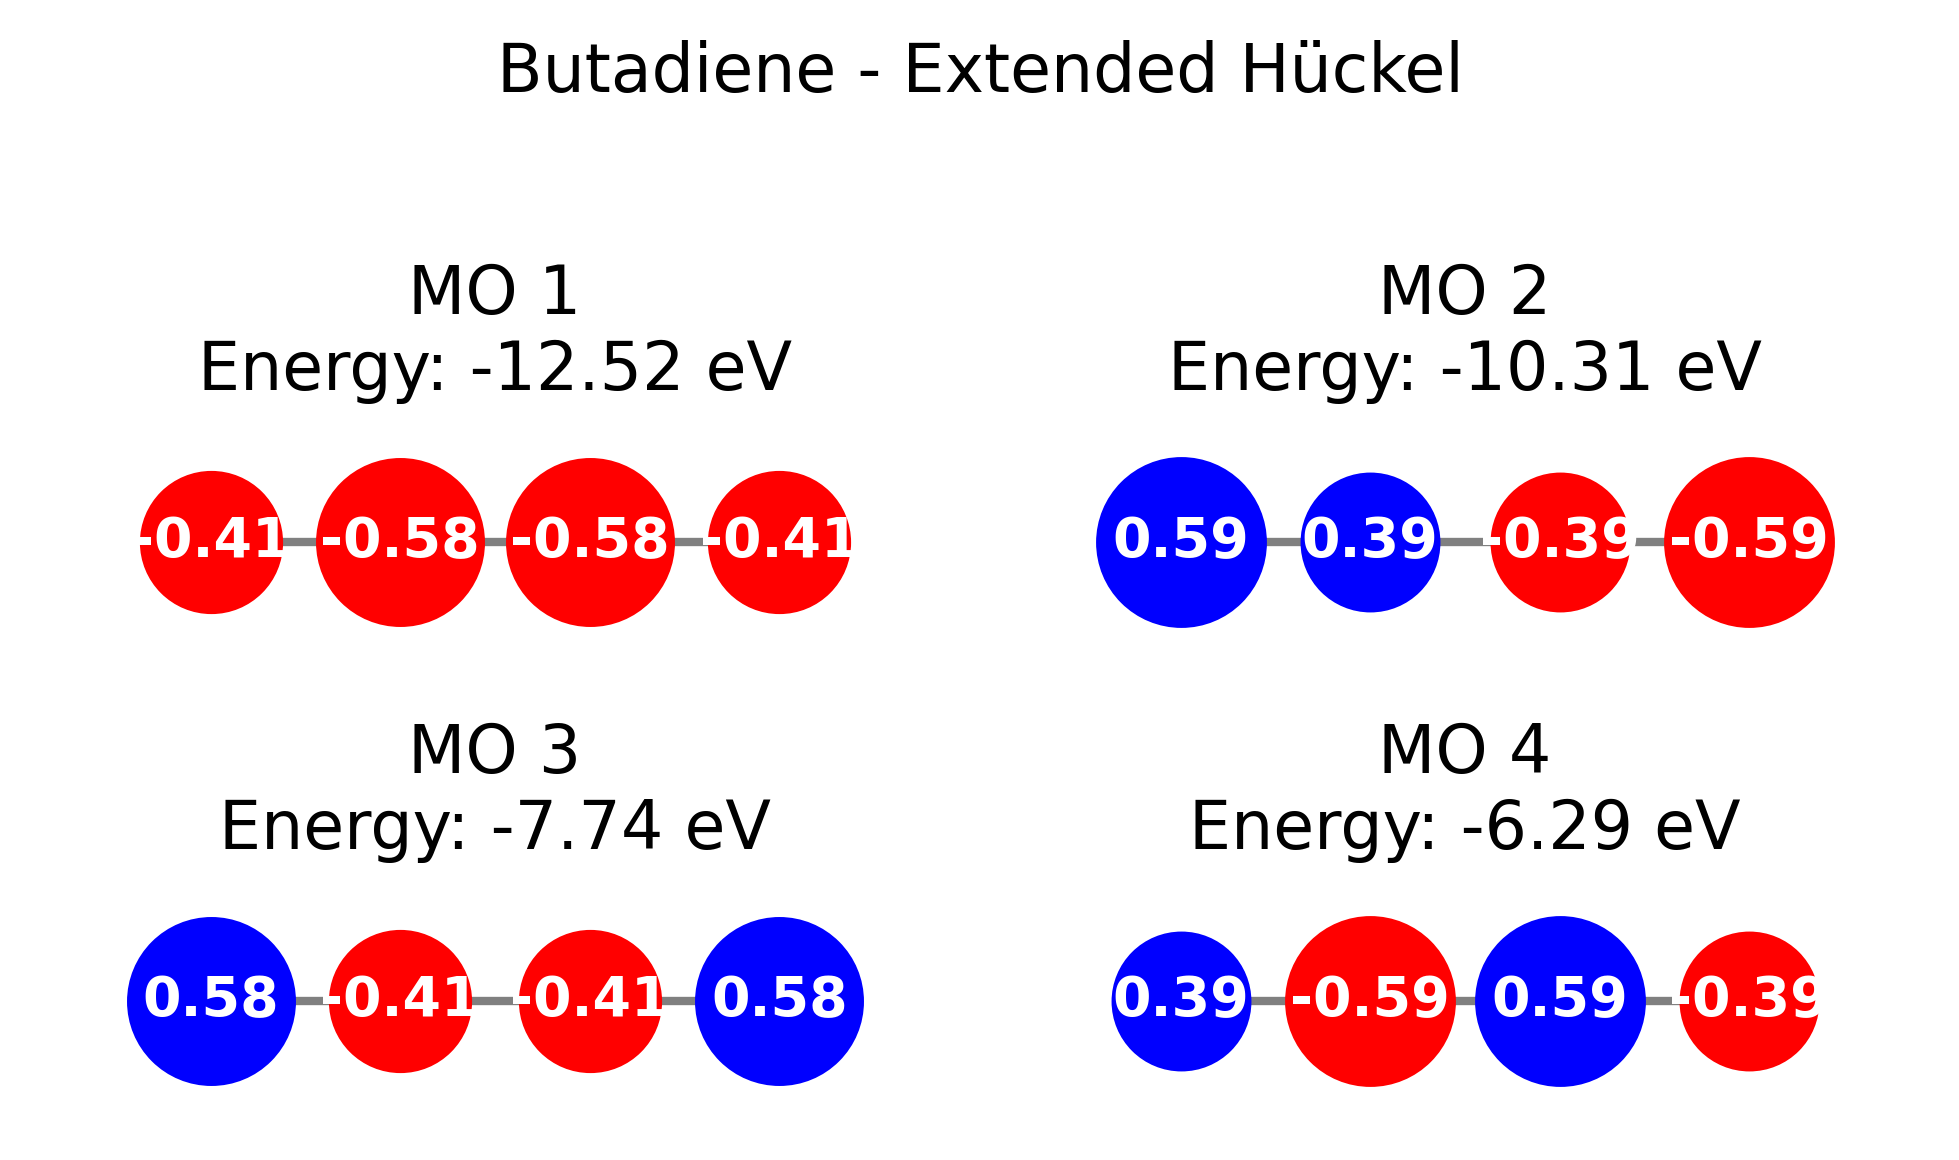

In [34]:
plotting_of_the_system(4, C, eigenvalues,'Extended Hückel', 3)

In [35]:
indices_valence_orbitals = [i for i, label in enumerate(butadiene_molecule.ao_labels()) if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
valence_orbitals = [label for label in butadiene_molecule.ao_labels() if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
alg_valence_orbitals = [label[2:6].rstrip() for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) if ('C 2px') in label]
print(butadiene_molecule.ao_labels())
print(indices_valence_orbitals)
print(valence_orbitals)
print(alg_valence_orbitals)
print(pz_indices_full)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 H 1s    ', '5 H 1s    ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
['0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 H 1s    ', '5 H 1s    ', '6 H 1s    ', '7 H 1s    ', '8 H 1s    ', '9 H 1s    ']
['C 2s', 'C 2p', 'C 2p', 'C 2p', 'C 2s', 'C 2p', 'C 2p', 'C 2p', 'C 2s', 'C 2p', 'C 2p', 'C 2p', 'C 2s', 'C 2p', 'C 2p', 'C 2p', 'H 1s', 'H 1s', 'H 1s', 'H 1s', 'H 1s', 'H 1s']
[1, 5, 9, 13]


In [36]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}

In [37]:
n = len(indices_valence_orbitals)
print(n)
H_full = np.zeros((n,n))

22


In [38]:
for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    H_full[i, i] = -alpha 
print(H_full)

[[-21.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.  -11.4   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.  -11.4   0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.  -11.4   0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.  -21.4   0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.  -11.4   0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.  -11.4   0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.  -11.

In [39]:
S_full = hf.get_ovlp()[[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]][:, [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]]
for i in range(n):
    for j in range(n):
        if i != j:
            H_full[i, j] = H_full[j, i] = K*S_full[i,j]*(H_full[i,i]+H_full[j,j])/2
print(H_full)

[[-2.14000000e+01 -0.00000000e+00 -7.82677349e-16  2.08673356e-14
  -1.49059292e+01 -0.00000000e+00  4.85093242e+00 -1.07547995e+01
  -2.13638182e+00 -0.00000000e+00 -2.87106718e-01 -2.41166114e+00
  -9.58843416e-02 -0.00000000e+00  1.00157883e-02 -1.40973719e-01
  -1.51136194e+01 -1.50987060e+01 -3.35466885e+00 -9.85715303e-01
  -4.04252236e-02 -8.13334473e-03]
 [-0.00000000e+00 -1.14000000e+01 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -4.77630061e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -4.72859286e-01 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -1.72815447e-02  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-7.82677349e-16 -0.00000000e+00 -1.14000000e+01  5.75447629e-31
  -4.85093242e+00 -0.00000000e+00 -2.86274216e+00 -4.24247046e+00
   2.87106718e-01  0.00000000e+00 -4.34313085e-01  3.23783350e-01
  -1.00157883e-02 -0.00000000e+00 -1.62997030e-02 -1.38195693e-02
  -5.9

In [40]:
controleer_orthonormaliteit(S_full)

from scipy.linalg import fractional_matrix_power
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
ASA = A@S_full@A

# Check orthonormality
controleer_orthonormaliteit(ASA)

De matrix is niet orthonormaal.
De matrix is orthonormaal.


In [41]:
H_p = A @ H_full @ A 
epsilon, C_p = np.linalg.eigh(H_p)

print(epsilon)
C = A @ C_p

eigenvalues = epsilon

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:]
print(C_0)

[-27.90611141 -25.36996754 -21.0793613  -19.05908719 -15.90279943
 -15.69582266 -14.73456796 -14.33832033 -13.71691616 -13.66918581
 -12.46047485  -9.44870649  -7.23638761   1.12806955   4.86252474
   4.94634643   8.50547267   9.42369239  12.73333732  15.0264053
  34.97378633  37.83217499]
[[-6.52527332e-16 -1.73991862e-15  1.15060464e-16 -1.74760718e-16
   1.04938904e-15  5.74203209e-16  2.44683290e-15 -4.42185701e-15
   4.09168145e-01 -5.30210211e-15  5.90043309e-01 -5.76698733e-01
  -3.89677935e-01  2.16022226e-17  1.20598360e-16 -7.83082457e-17
  -1.13560036e-16  1.09908618e-17  1.25249384e-16 -1.37737976e-16
  -2.51692351e-16 -3.23411767e-19]
 [-8.47109891e-17 -4.23128723e-18 -4.62685559e-16  1.86180710e-16
   1.91055746e-16  7.14829088e-16  2.90482053e-15 -5.17739058e-15
   5.76698733e-01 -4.68970265e-15  3.89677935e-01  4.09168145e-01
   5.90043309e-01  1.48249809e-16 -3.72381097e-17 -6.86212104e-17
  -1.17600968e-17  5.24836458e-17  5.64688377e-17 -6.79620431e-17
   2.67404306e

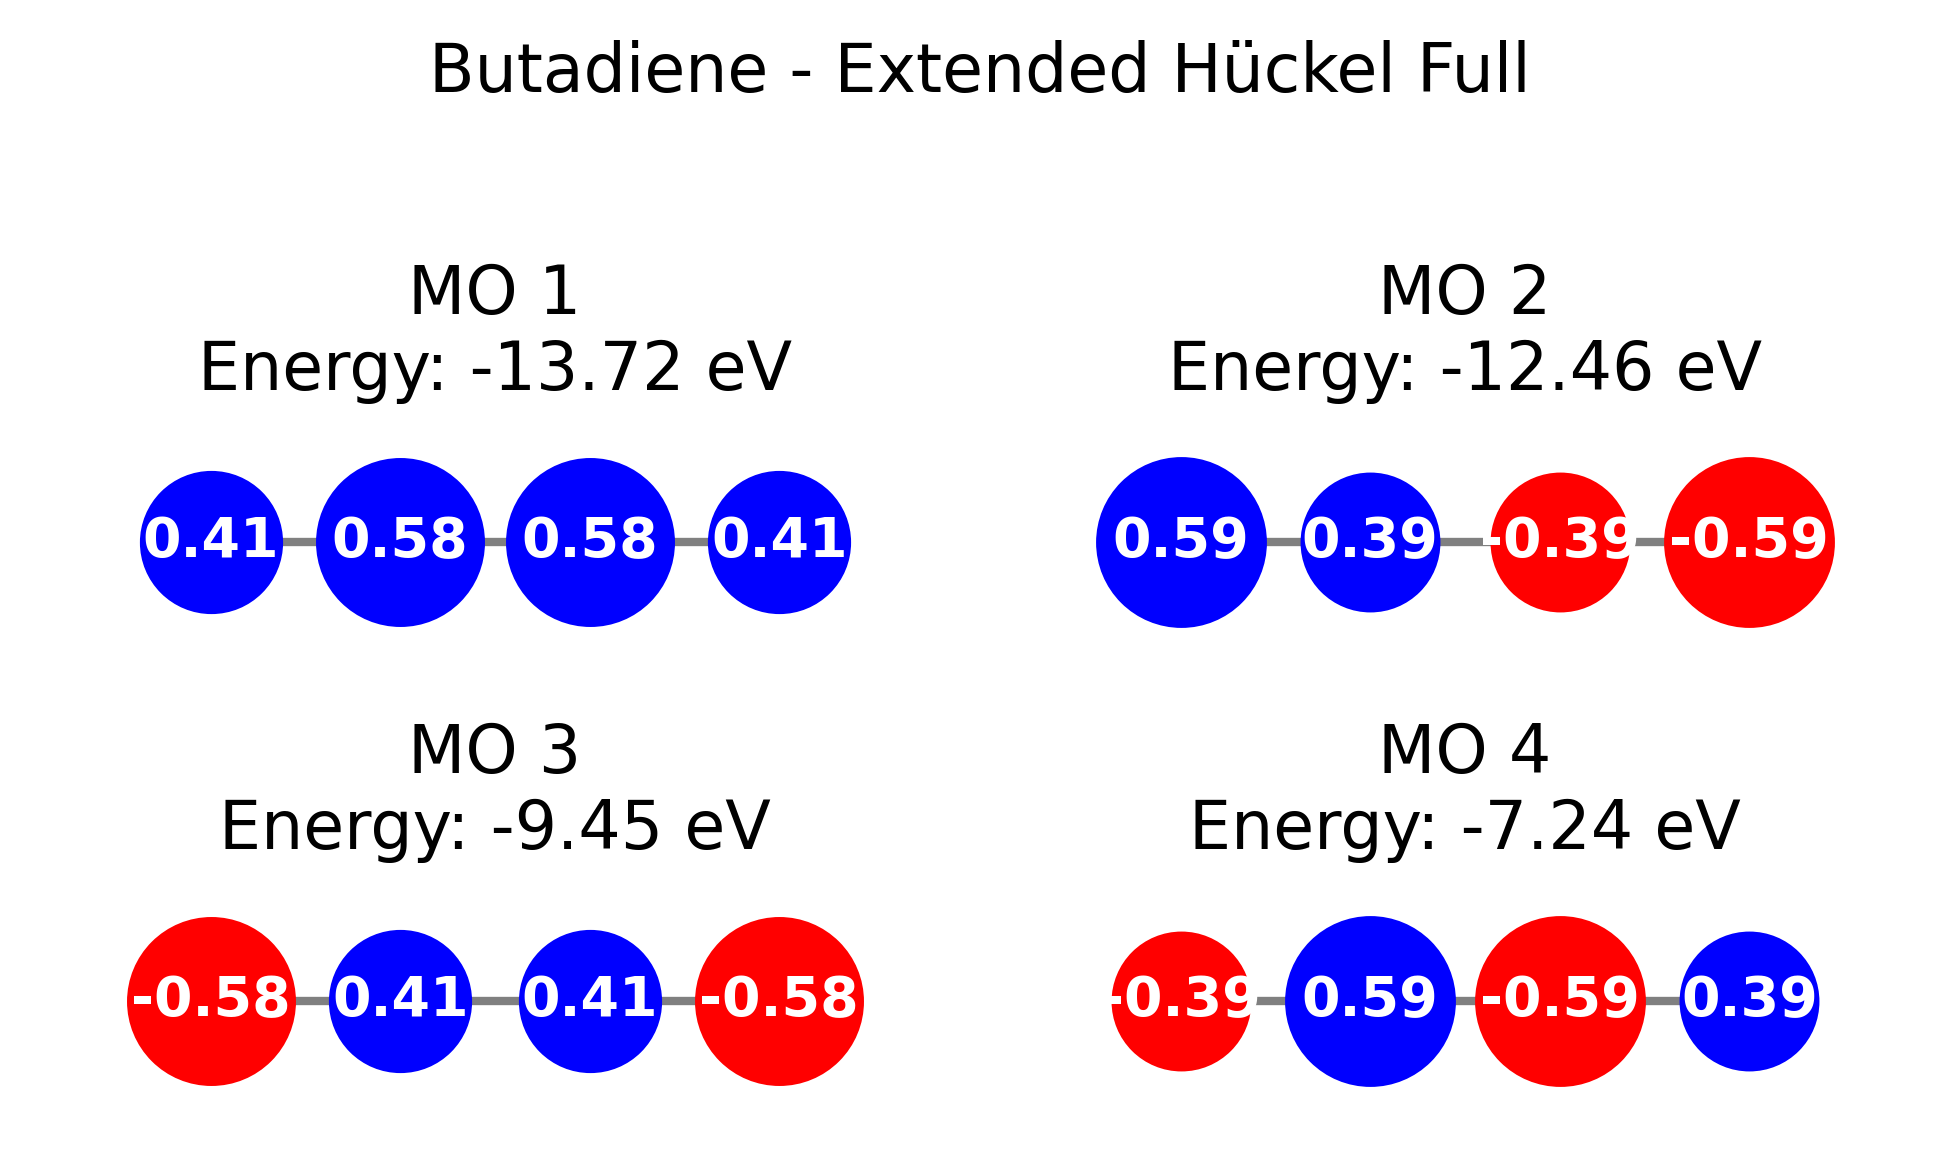

In [42]:
plotting_of_the_system(4, C_0[:, [8,10,11,12]], eigenvalues[[8,10,11,12]],'Extended Hückel Full', 3)

In [43]:
number_of_electrons = 22
E = 0
D = np.zeros((number_of_electrons,number_of_electrons))

elec_to_place = number_of_electrons

for i in range(number_of_electrons):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((C[:,i]).reshape(-1,1) @ (C[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
    E += elec_in_orbital* eigenvalues[i]
print(E)
print(D.round(6))
print(np.diag(D))


-387.86522926922214
[[ 1.458268e+00 -0.000000e+00 -3.638600e-02  6.391900e-02  4.136940e-01
   0.000000e+00 -1.672820e-01  3.229130e-01 -8.288700e-02  0.000000e+00
  -3.976200e-02 -1.427410e-01 -6.432000e-03  0.000000e+00  2.192000e-03
  -5.300000e-04  4.327430e-01  4.404630e-01 -1.941820e-01 -6.514700e-02
   1.742000e-03 -1.121200e-02]
 [-0.000000e+00  1.031139e+00  0.000000e+00  0.000000e+00 -0.000000e+00
   9.317870e-01  0.000000e+00 -0.000000e+00  0.000000e+00  1.208000e-02
  -0.000000e+00  0.000000e+00  0.000000e+00 -3.614650e-01 -0.000000e+00
  -0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00 -0.000000e+00
   0.000000e+00  0.000000e+00]
 [-3.638600e-02  0.000000e+00  8.503800e-01  3.550600e-02  1.409900e-01
  -0.000000e+00 -6.959700e-02  2.337590e-01 -3.727000e-03 -0.000000e+00
  -5.123100e-02 -1.536900e-02 -2.192000e-03  0.000000e+00 -2.079400e-02
   7.930000e-03  4.931340e-01 -8.165840e-01 -8.385200e-02  2.897200e-02
  -1.004700e-02  8.484000e-03]
 [ 6.391900e-02  0.0000

In [44]:
print(D[pz_indices_full][:, pz_indices_full])

[[ 1.03113936  0.93178722  0.01207979 -0.36146507]
 [ 0.93178722  0.96886064  0.36146507  0.01207979]
 [ 0.01207979  0.36146507  0.96886064  0.93178722]
 [-0.36146507  0.01207979  0.93178722  1.03113936]]


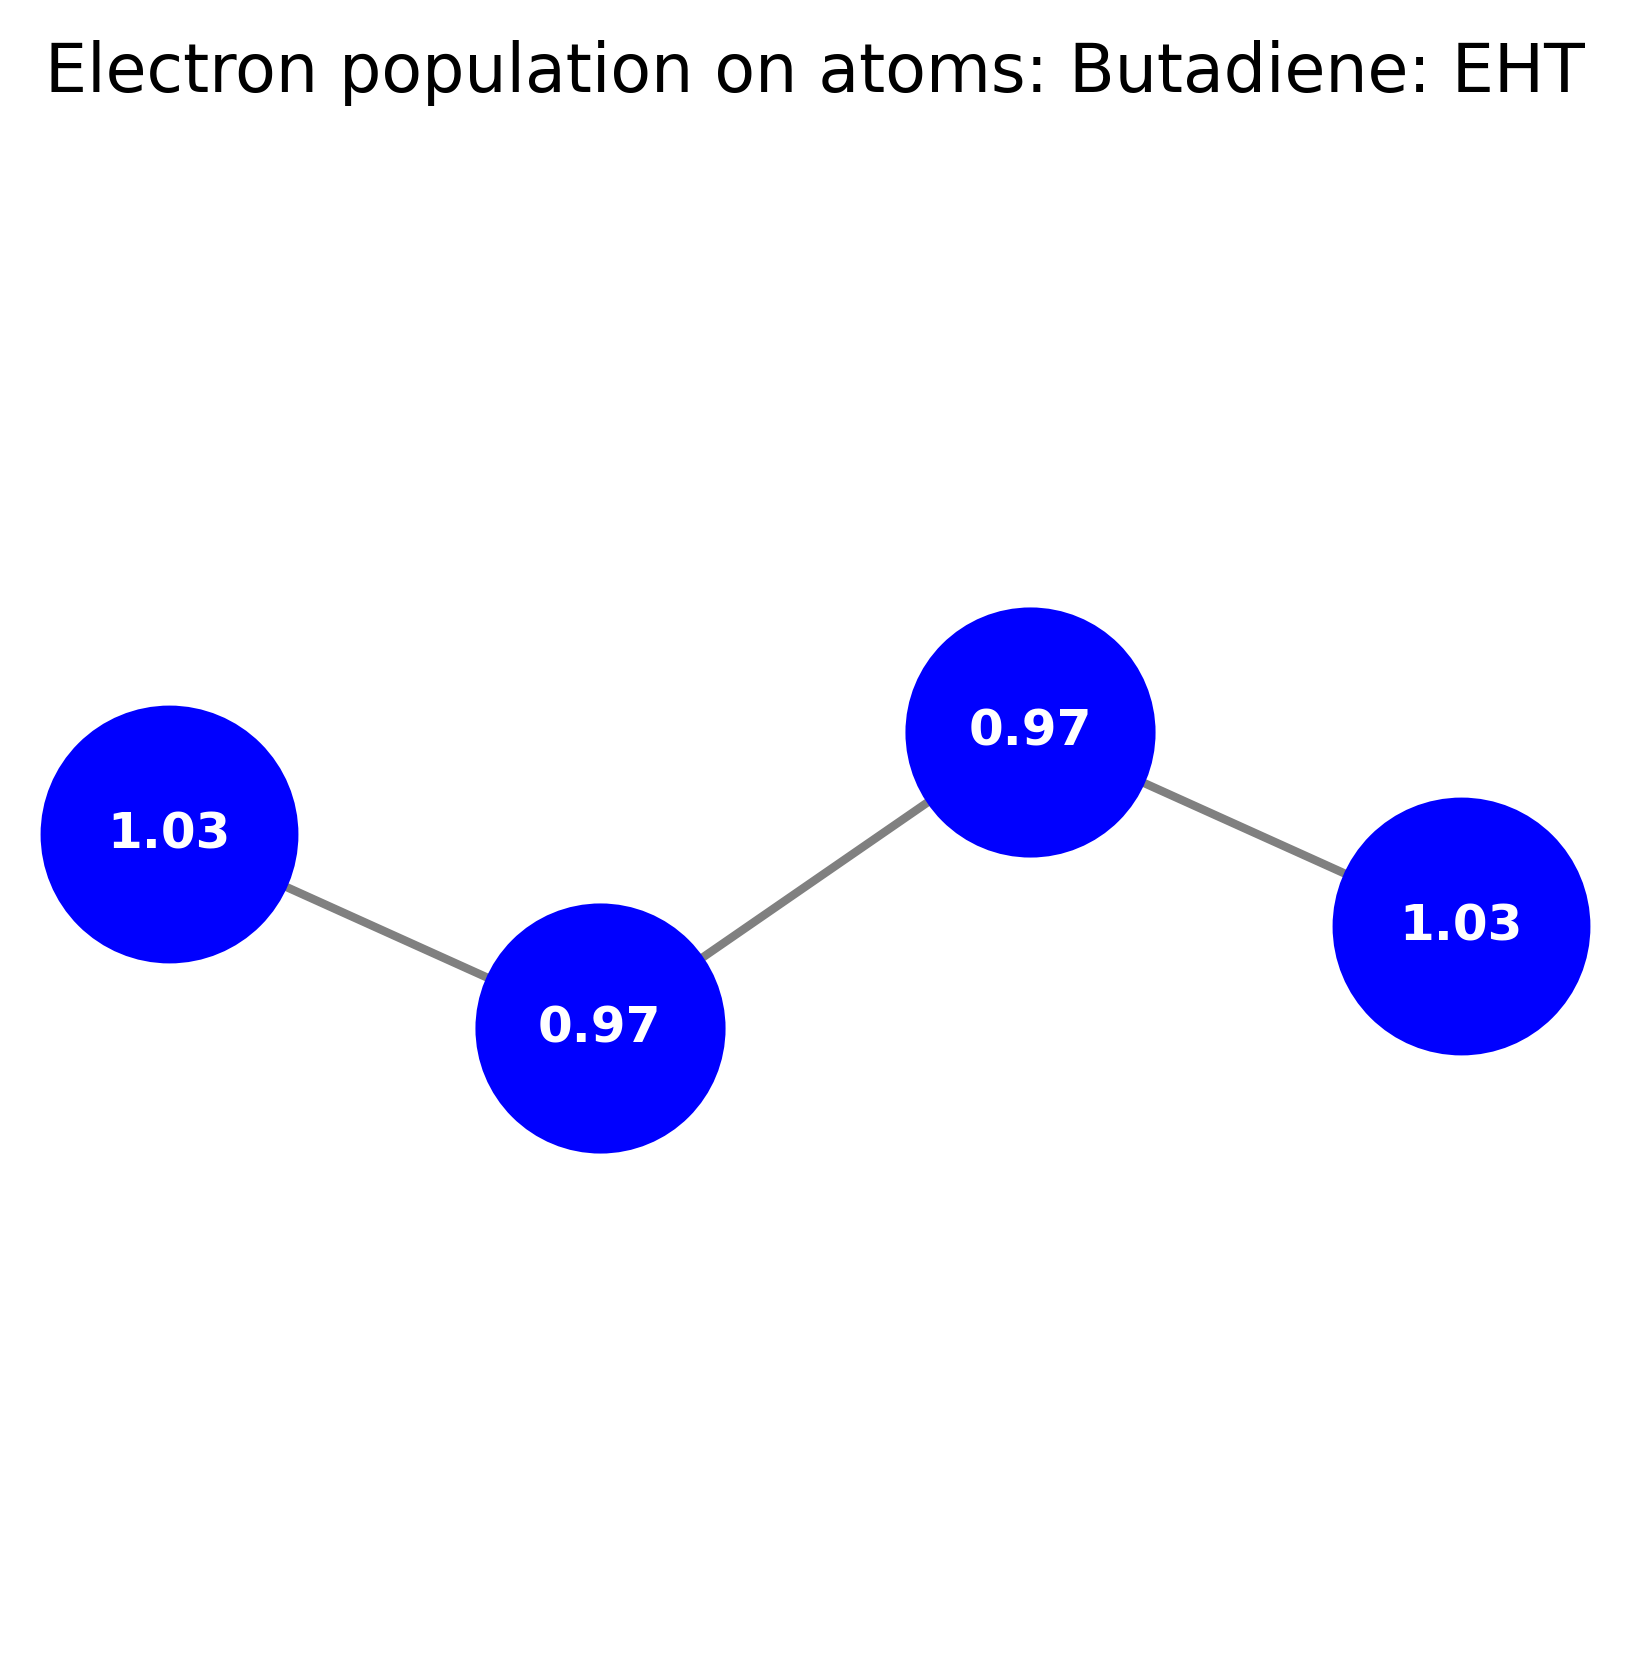

In [45]:
pts.plotting_of_D_atoms(4,coordinates, [], D[pz_indices_full][:, pz_indices_full], 'Butadiene', 'EHT')